In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline
from scipy.integrate import trapezoid, solve_ivp

In [6]:

#Dados da questão
r   = 30*1e-2
N1  = 1000
U0  = 4*np.pi*1e-7
Lc  = 140*1e-2
Ac  = np.pi * (r**2)

num_pontos = 200

Massa = 10  # massa de 10Kg

#caso real
CampoMagnetico = np.array([0, 68, 135, 203, 271, 338, 406, 474, 542, 609, 1100, 1500, 2500, 4000, 5000, 9000, 12000, 20000, 25000])
DensidadeCampo = np.array([0, 0.733, 1.205, 1.424, 1.517, 1.560, 1.588, 1.617, 1.631, 1.646, 1.689, 1.703,1.724, 1.731, 1.738, 1.761, 1.770, 1.800, 1.816])

#caso linear
CampoMagnetico_linear = np.array([0, 68])
DensidadeCampo_linear = np.array([0, 0.733])


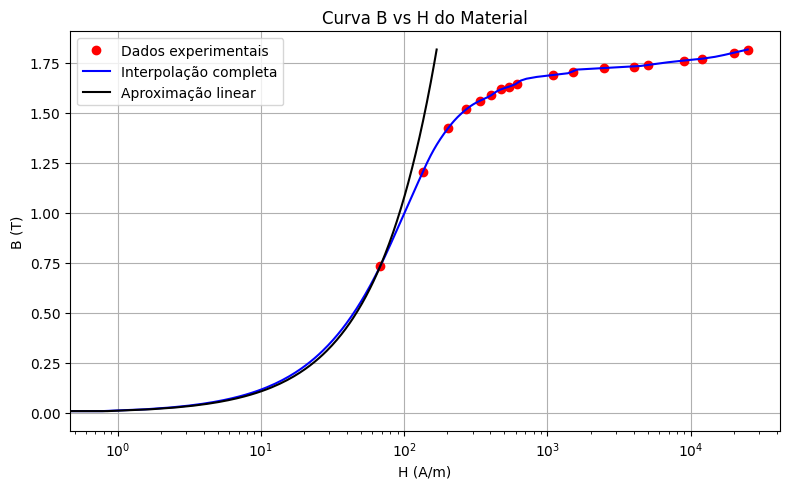

In [7]:
# Interpolação cúbica (ordem crescente de B)
f_real = CubicSpline(DensidadeCampo, CampoMagnetico, bc_type='natural')
f_linear = CubicSpline(DensidadeCampo_linear, CampoMagnetico_linear, bc_type='natural')

# Geração de pontos para interpolação
B_a = np.linspace(min(DensidadeCampo), max(DensidadeCampo), num_pontos)
H_a = f_real(B_a)
H_linear_a = f_linear(B_a)

# Plotagem
fig, ax = plt.subplots(figsize=(8, 5))
ax.plot(CampoMagnetico, DensidadeCampo, 'ro', label='Dados experimentais')
ax.plot(H_a, B_a, 'b-', label='Interpolação completa')
ax.plot(H_linear_a, B_a, 'k-', label='Aproximação linear')

ax.set_title('Curva B vs H do Material')
ax.set_xlabel('H (A/m)')
ax.set_ylabel('B (T)')
ax.set_xscale('log')
ax.grid(True)
ax.legend()
plt.tight_layout()
plt.show()

#### Em todos os exercícios a seguir considere que o sistema é alimentado por uma fonte ideal de corrente constante.

- Determine X de modo que área útil para passagem de fluxo magnético nas paredes mais externas
seja a mesma que na coluna central.

- Considerando uma corrente aplicada na bobina de 1 A, apresente um gráfico para a força
magnética que surge no sistema em função do comprimento do entreferro nas condições a
seguir:

In [8]:
'''
Área1 = π * 0.30²
Área2 = (π * X²) - π*(X-0.10)²
Área1 = Área2 =π * 0.30² = (π * X²) - π*(X-0.10)²
assim obtemos que :
X = 0.50
'''

'\nÁrea1 = π * 0.30²\nÁrea2 = (π * X²) - π*(X-0.10)²\nÁrea1 = Área2 =π * 0.30² = (π * X²) - π*(X-0.10)²\nassim obtemos que :\nX = 0.50\n'

In [27]:
def Coenergia_forca(Interpolacao_H_B, corrente):
    # variação de g, no intreferro
    g = np.linspace(0, 0.005, num_pontos)# 5 mm em metros

    # variação de Bm
    Bm = np.linspace(0, np.max(DensidadeCampo), num_pontos)
    # Corrente variavel para o fluxo com variação do entreferro -> Inicia um vetor com todos os valores nulos
    I_variavel = np.zeros(num_pontos)
    # Fluxo concatenado
    fluxo_concatenado = np.zeros(num_pontos)
    Coenergia = np.zeros(num_pontos)

    for j in range(len(g)):
      for b in range(len(Bm)):

        # If = (Hi*d + Bm*[x + g0]/U0) /Nf
        I_variavel[b] = ((Interpolacao_H_B(Bm[b])*Lc) + ((Bm[b]*(g[j])/U0)))/N1

        # λ =  Nf * Bm * Area_do_imã
        fluxo_concatenado[b] =  N1*Bm[b]*Ac

      # Interpolação de λ , Bm
      interpolacao_fluxo_concatenado_If = CubicSpline(I_variavel,fluxo_concatenado)

      #limite de integração do λ
      lim_int_fluxo_concatenado = np.linspace(0, corrente, num_pontos)
      #valores para coenergia
      interpol_fluxo_concatenado = interpolacao_fluxo_concatenado_If(lim_int_fluxo_concatenado)
      #valores para coenergia
      Coenergia[j] = trapezoid(interpol_fluxo_concatenado,lim_int_fluxo_concatenado)

    
    Forca = np.gradient(Coenergia[:len(g)-1], g[:len(g)-1])
    return Forca, Coenergia[:len(Coenergia)-1],(g[:len(g)-1])

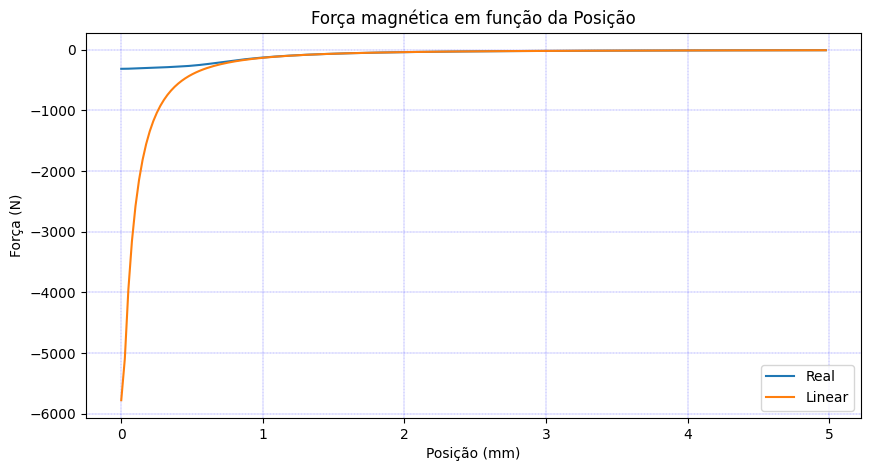

In [28]:
# ----- Cálculo -----
Forca_real, Co_energia_real, posicao  = Coenergia_forca(f_real, 1)
Forca_linear, Co_energia_linear, posicao = Coenergia_forca(f_linear, 1)

# ----- Plot -----
plt.figure(figsize=[10,5])
plt.plot(posicao*1000, Forca_real*1e-3, label="Real")    # x em mm
plt.plot(posicao*1000, Forca_linear*1e-3, label="Linear")
plt.xlabel("Posição (mm)")
plt.ylabel("Força (N)")
plt.title("Força magnética em função da Posição")
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.2, color='blue')
plt.show()